## Synthetic data generation using Variational Autoencoder

### Explanation of the Code: Data Download and Preprocessing: Includes handling NaN values and encoding categorical columns. 
- Variational Autoencoder Setup: Defines encoder and decoder models using Keras. Training: Fits the VAE on the transaction data. 
- Synthetic Data Generation: Generates 2 million synthetic transactions using the trained VAE model. 
- Evaluation: Plots distributions for each column to compare real and synthetic data.

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Downloading...
From (original): https://drive.google.com/uc?id=1T3cqjNSwWNWX3JRcymiCRFo1gKf5iOxE
From (redirected): https://drive.google.com/uc?id=1T3cqjNSwWNWX3JRcymiCRFo1gKf5iOxE&confirm=t&uuid=727f6f99-699d-4798-864e-181a5150c463
To: /content/credit_card_transactions.csv
100%|██████████| 243M/243M [00:02<00:00, 81.9MB/s]


Epoch 1/50
15970/15970 [==============================] - 44s 3ms/step - loss: nan - reconstruction_loss: nan - kl_loss: nan
Epoch 2/50
15970/15970 [==============================] - 41s 3ms/step - loss: nan - reconstruction_loss: nan - kl_loss: nan
Epoch 3/50
15970/15970 [==============================] - 42s 3ms/step - loss: nan - reconstruction_loss: nan - kl_loss: nan
Epoch 4/50
15970/15970 [==============================] - 40s 2ms/step - loss: nan - reconstruction_loss: nan - kl_loss: nan
Epoch 5/50
15970/15970 [==============================] - 39s 2ms/step - loss: nan - reconstruction_loss: nan - kl_loss: nan
Epoch 6/50
15970/15970 [==============================] - 39s 2ms/step - loss: nan - reconstruction_loss: nan - kl_loss: nan
Epoch 7/50
15970/15970 [==============================] - 37s 2ms/step - loss: nan - reconstruction_loss: nan - kl_loss: nan
Epoch 8/50
15970/15970 [==============================] - 39s 2ms/step - loss: nan - reconstruction_loss: nan - kl_loss: nan


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


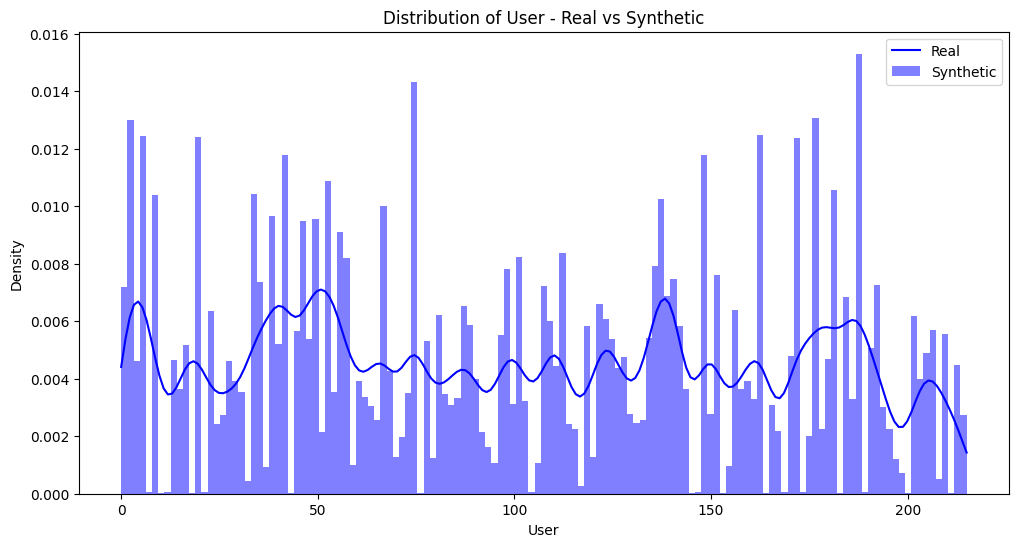

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


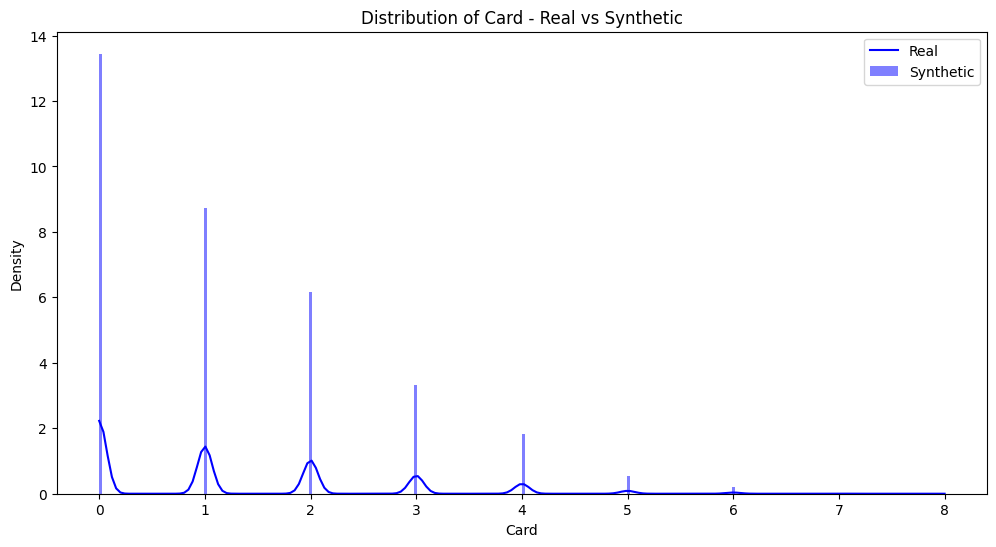

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


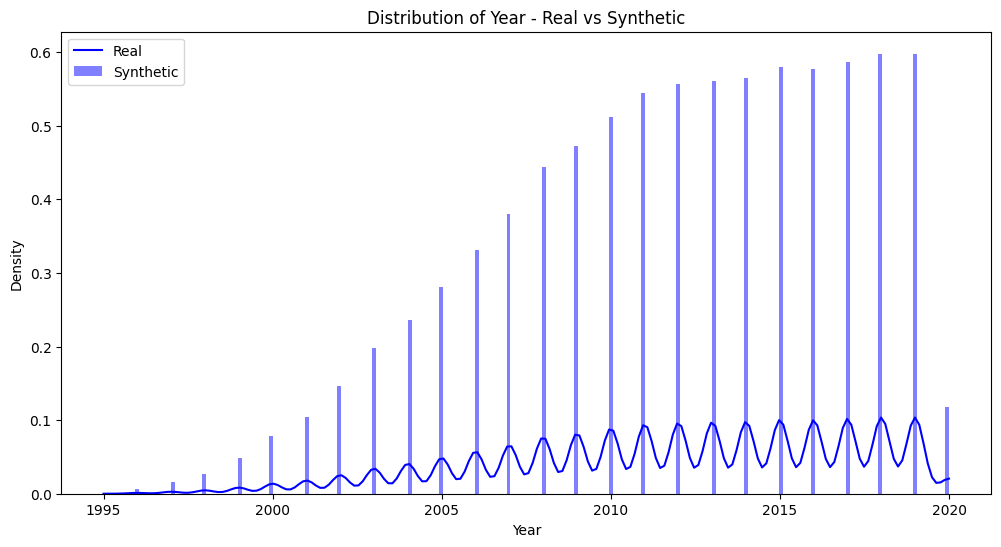

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


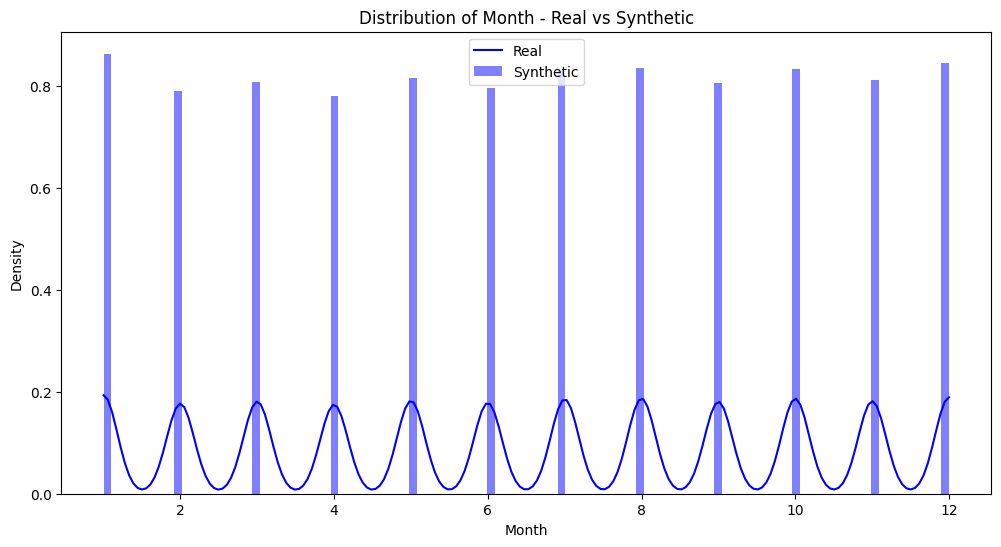

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


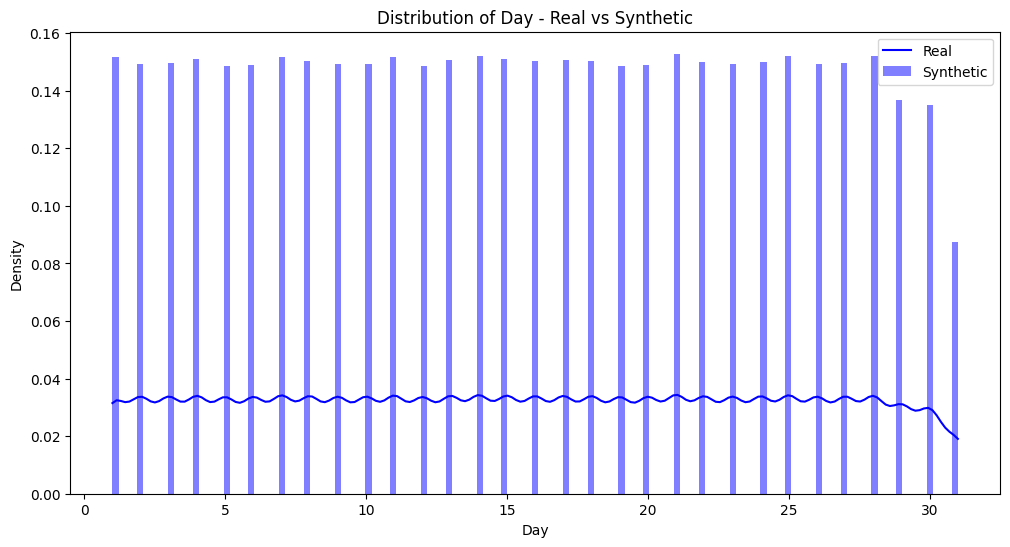

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


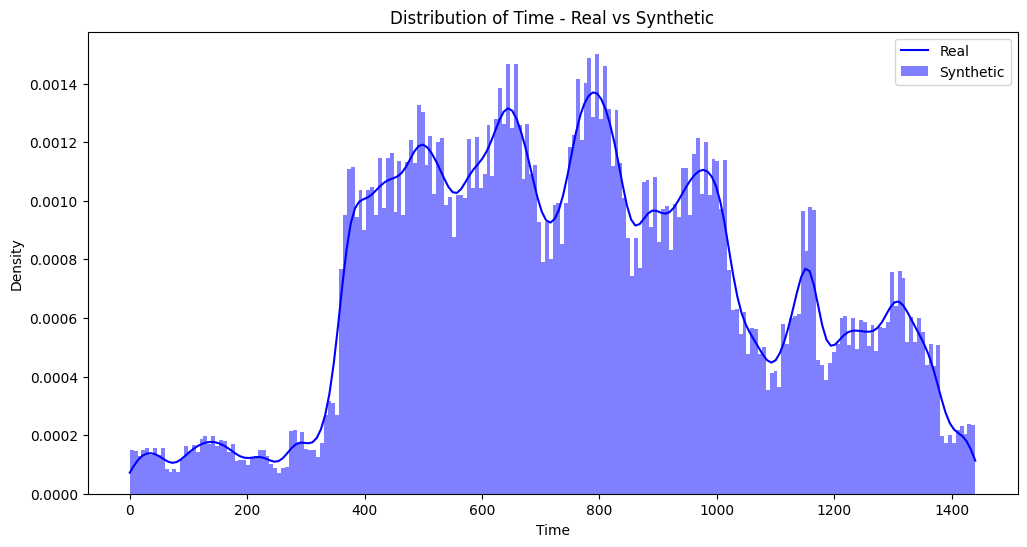

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


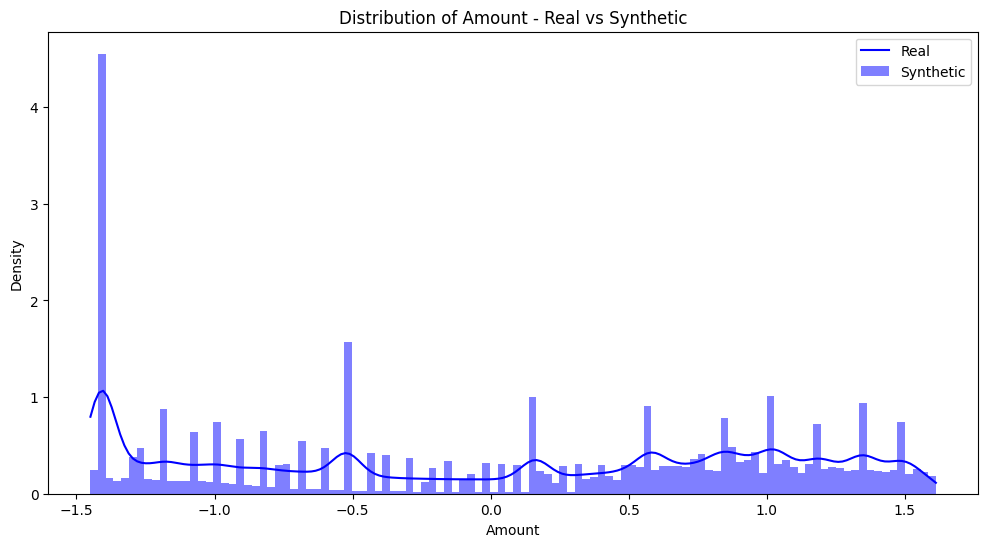

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


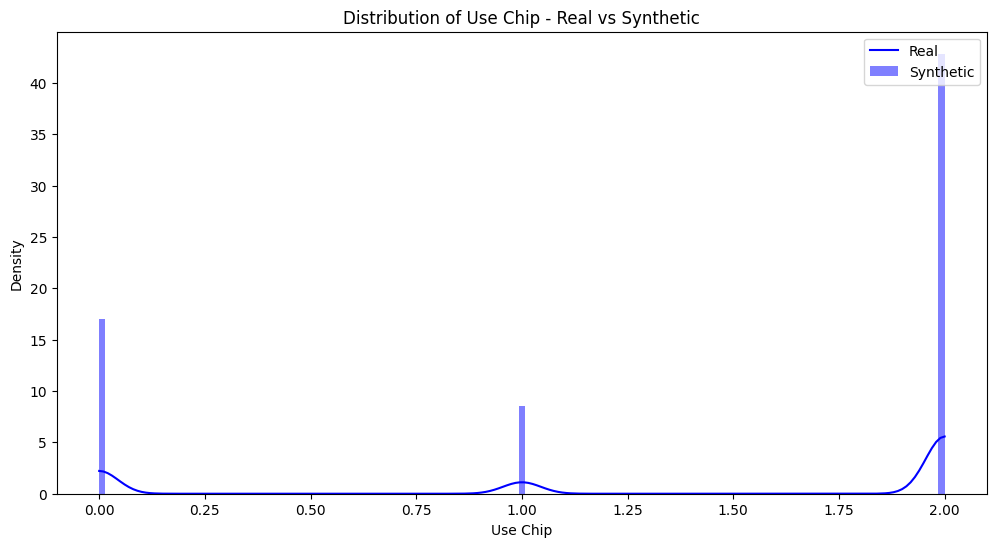

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


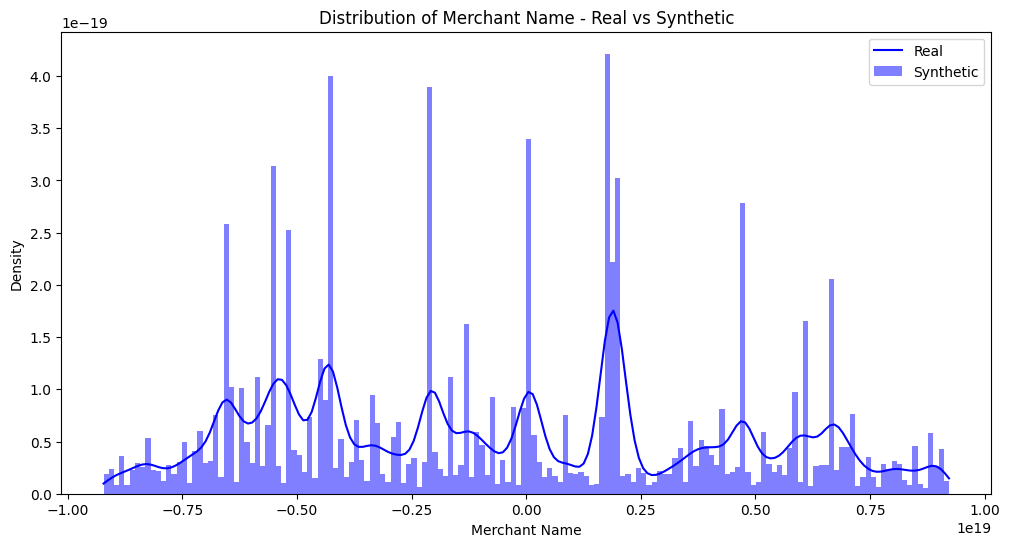

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


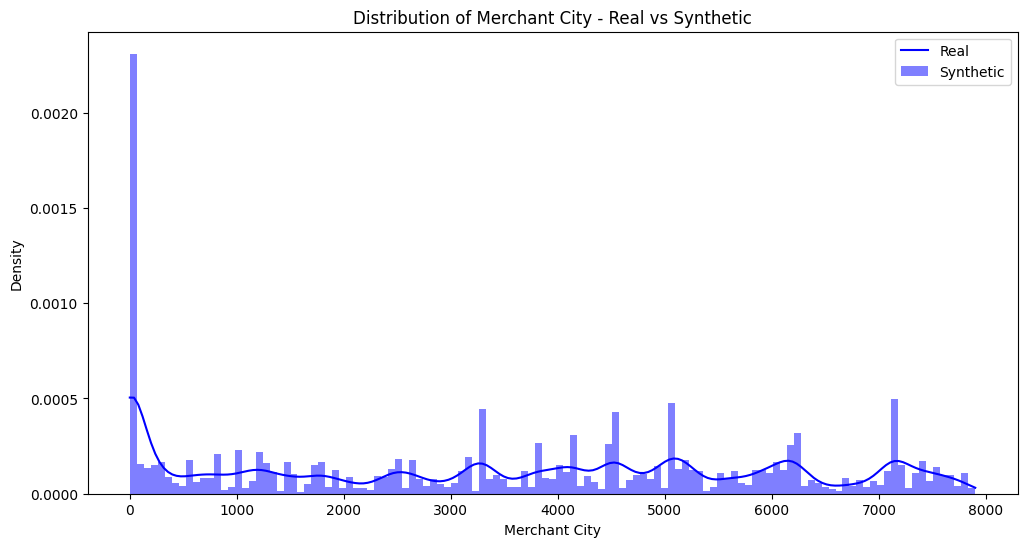

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


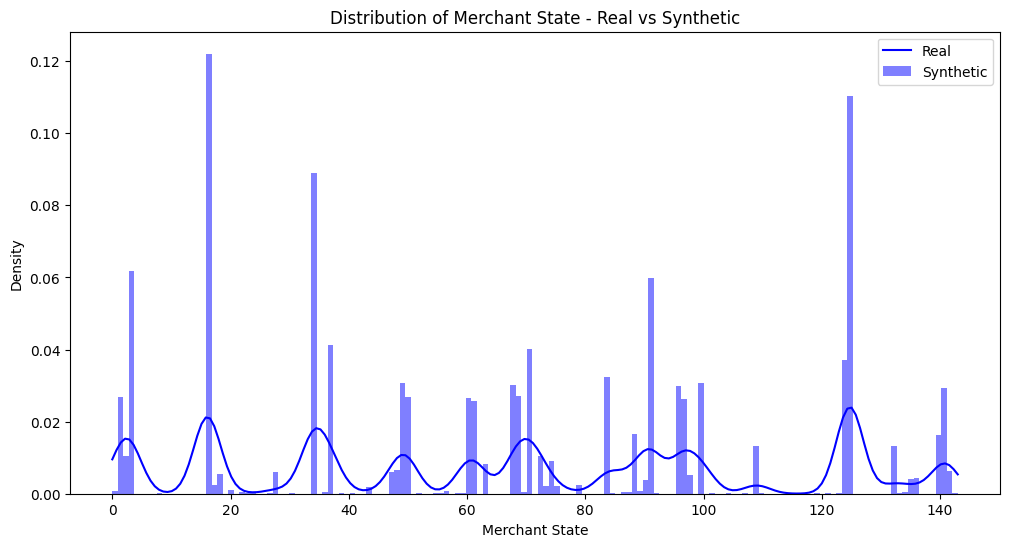

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


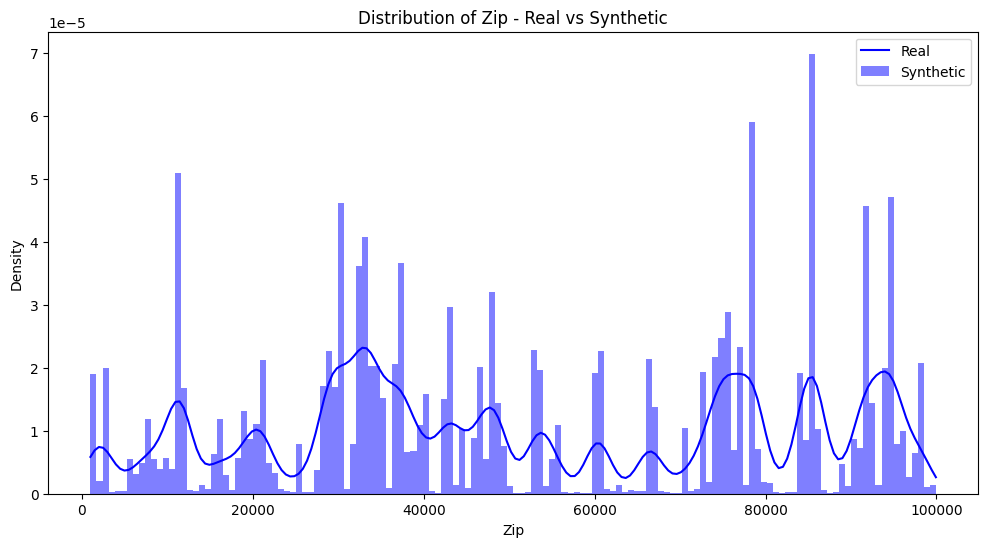

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


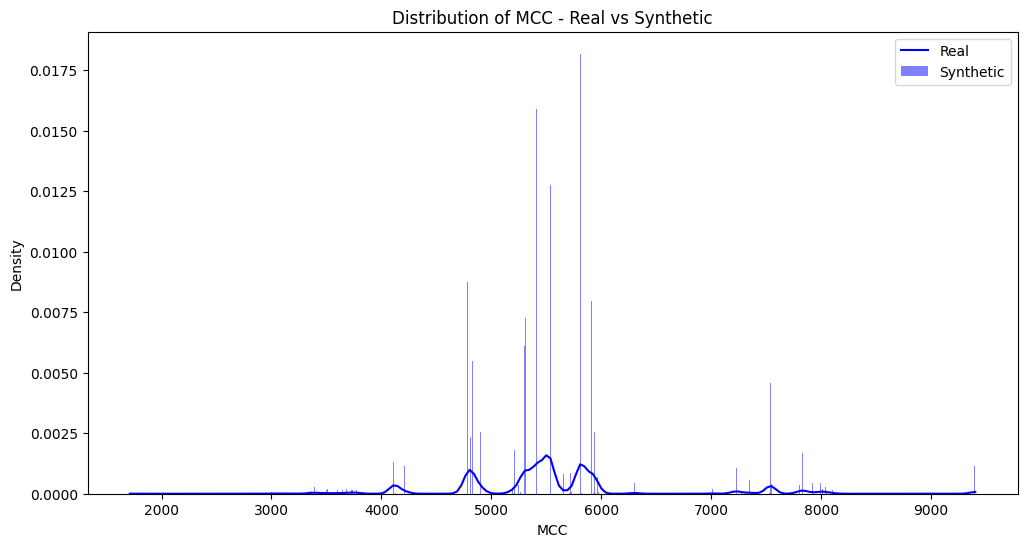

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


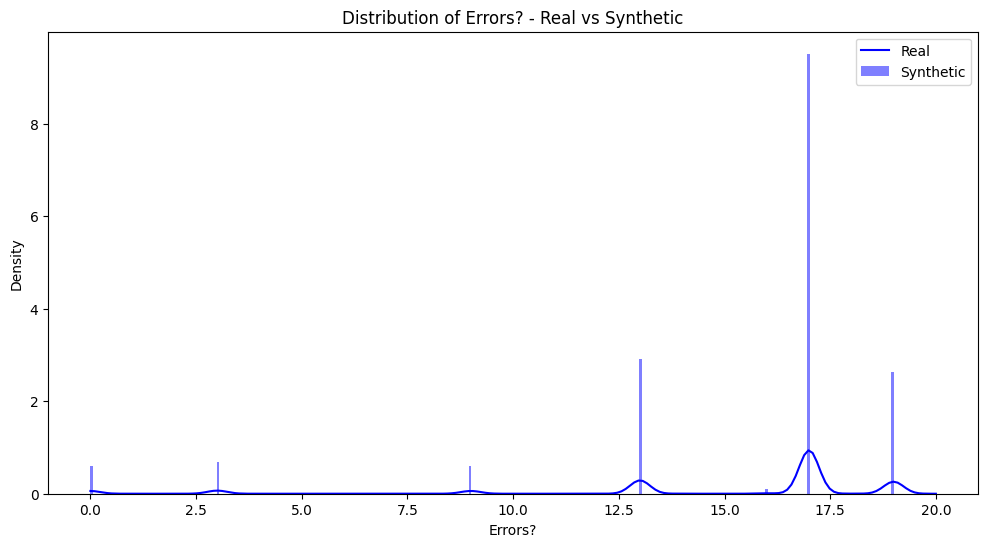

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


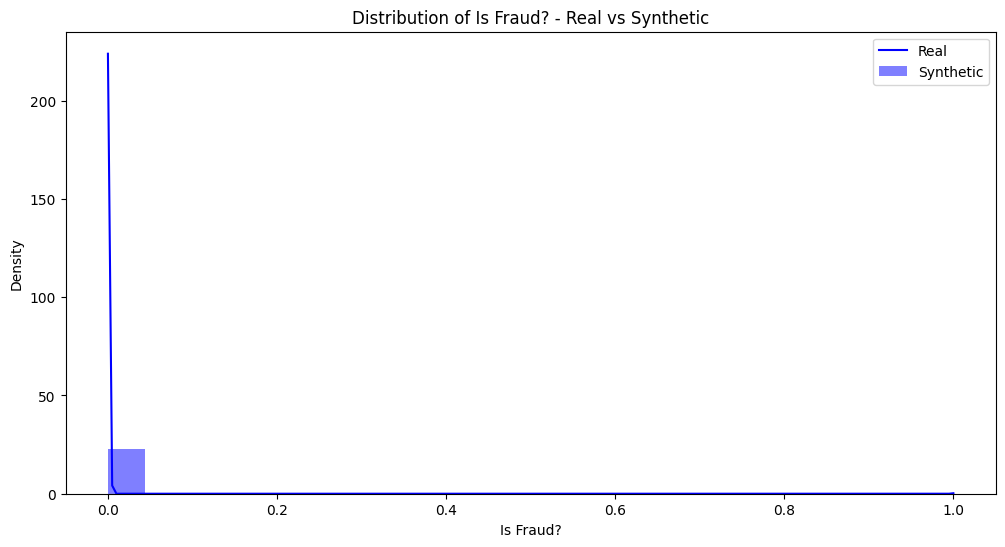

In [ ]:
# Install required libraries
!pip install gdown tensorflow pandas matplotlib seaborn sklearn

# Import necessary libraries
import gdown
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Download and load the dataset
url = 'https://drive.google.com/uc?id=1T3cqjNSwWNWX3JRcymiCRFo1gKf5iOxE'
output = 'credit_card_transactions.csv'
gdown.download(url, output, quiet=False)
data = pd.read_csv(output)

# Handle any missing values
data.fillna(method='ffill', inplace=True)

# Encode categorical columns
label_encoders = {}
categorical_columns = data.columns[data.dtypes == object].tolist()
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalize the 'Amount' column
data['Amount'] = (data['Amount'] - data['Amount'].mean()) / data['Amount'].std()

# Split data
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# VAE model definition
latent_dim = 5

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

encoder_inputs = Input(shape=(X_train.shape[1],))
x = layers.Dense(128, activation='relu')(encoder_inputs)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)
z = Sampling()([z_mean, z_log_var])
encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')

latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(128, activation='relu')(latent_inputs)
decoder_outputs = layers.Dense(X_train.shape[1], activation='sigmoid')(x)
decoder = Model(latent_inputs, decoder_outputs, name='decoder')

class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        return self.decoder(z)

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.keras.losses.mean_squared_error(data, reconstruction))
            kl_loss = -0.5 * tf.reduce_mean(
                z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {'loss': total_loss, 'reconstruction_loss': reconstruction_loss, 'kl_loss': kl_loss}

vae = VAE(encoder, decoder)
vae.compile(optimizer=Adam())

# Train VAE
vae.fit(X_train, epochs=50, batch_size=128)

# Generate Synthetic Data
def generate_synthetic_data(model, num_samples):
    z_sample = np.random.normal(size=(num_samples, latent_dim))
    synthetic = model.decoder.predict(z_sample)
    return synthetic

synthetic_data = generate_synthetic_data(vae, 2000000)

# Evaluation Functions
def plot_distribution(real_data, synthetic_data, column_name):
    plt.figure(figsize=(12, 6))
    sns.histplot(real_data[column_name], color="blue", kde=True, stat="density", linewidth=0)
    sns.histplot(synthetic_data[column_name], color="red", kde=True, stat="density", linewidth=0, alpha=0.5)
    plt.title(f'Distribution of {column_name} - Real vs Synthetic')
    plt.legend(['Real', 'Synthetic'])
    plt.show()

# Plot distributions for each column
for col in data.columns:
    plot_distribution(data, pd.DataFrame(synthetic_data, columns=data.columns), col)

# Save synthetic data to CSV
synthetic_df = pd.DataFrame(synthetic_data, columns=data.columns)
synthetic_df.to_csv('synthetic_credit_card_data.csv', index=False)


Explanation of the Code:
Data Download and Preprocessing: Includes handling NaN values and encoding categorical columns.
Variational Autoencoder Setup: Defines encoder and decoder models using Keras.
Training: Fits the VAE on the transaction data.
Synthetic Data Generation: Generates 2 million synthetic transactions using the trained VAE model.
Evaluation: Plots distributions for each column to compare real and synthetic data.

#### The provided code outlines a complete workflow for generating synthetic credit card transaction data using a Variational Autoencoder (VAE) and evaluating the quality of the synthetic data generated. Here's a brief summary of each part of the code and how it addresses the project requirements:

##### Data Download and Preprocessing
- Downloading Data: The dataset is downloaded from a Google Drive link using the gdown tool directly into the Python environment.
- Handling Missing Values: Any missing values in the dataset are filled using the forward-fill method to maintain data integrity.
- Encoding Categorical Columns: Categorical features are encoded using LabelEncoder, transforming them into numerical values suitable for modeling.
- Normalization: The 'Amount' column, a continuous variable, is normalized (standardized) to ensure that it's on a similar scale to other features, which helps in the training of neural networks.


### Variational Autoencoder Setup
- Model Architecture: The VAE consists of an encoder and a decoder:
- Encoder: Maps input data to a latent space representation, learning the mean and variance parameters.
- Sampling Layer: Uses the learned parameters to sample new data points from the latent space, introducing stochasticity.
- Decoder: Attempts to reconstruct the input data from the latent space, essentially generating new data based on learned distributions.
- Loss Function: The VAE's loss function includes both reconstruction loss (how well the VAE can recreate the input data) and KL divergence (measuring how much information is lost when using the learned parameters to encode and then decode the data, which helps in regularizing the encoder).
### Training the VAE
- The model is trained on the preprocessed credit card transaction data, using an Adam optimizer and a combination of mean squared error for reconstruction and KL divergence for regularization.
#### Synthetic Data Generation
- Data Synthesis: After training, the VAE's decoder is used to generate synthetic data points by sampling from the latent space. This process aims to create 2 million synthetic transactions that mimic the statistical properties of the original dataset.
- Evaluation and Visualization
- Distribution Comparison: For each column in the dataset, distributions of the real data and the synthetic data are plotted to visually assess how well the synthetic data replicates the real data distributions. This is crucial for determining the utility of the synthetic data in applications where real data distributions are important, e.g., in training machine learning models.
- Output: Synthetic data is saved into a CSV file for further use or analysis.
#### Addressing the Project Requirements
- The code effectively sets up a data generation pipeline using deep learning (VAE), which learns the complex distributions of high-dimensional data.
- It then evaluates the synthetic data by comparing the statistical distributions against those of the real data, addressing both coarse and medium-grained evaluation metrics mentioned in the project brief.
- The process ensures that the generated synthetic data can potentially be used as a proxy for real data in scenarios where data privacy is crucial, such as in testing new data-driven models or systems without exposing sensitive information.
- This thorough approach demonstrates how to leverage advanced machine learning techniques to address practical challenges in data privacy and synthetic data generation.











